# What drives the price of a car?

![](images/kurt.jpeg)

**OVERVIEW**

In this application, you will explore a dataset from kaggle. The original dataset contained information on 3 million used cars. The provided dataset contains information on 426K cars to ensure speed of processing.  Your goal is to understand what factors make a car more or less expensive.  As a result of your analysis, you should provide clear recommendations to your client -- a used car dealership -- as to what consumers value in a used car.

### CRISP-DM Framework

<center>
    <img src = images/crisp.png width = 50%/>
</center>


To frame the task, throughout our practical applications we will refer back to a standard process in industry for data projects called CRISP-DM.  This process provides a framework for working through a data problem.  Your first step in this application will be to read through a brief overview of CRISP-DM [here](https://mo-pcco.s3.us-east-1.amazonaws.com/BH-PCMLAI/module_11/readings_starter.zip).  After reading the overview, answer the questions below.

### Business Understanding

From a business perspective, we are tasked with identifying key drivers for used car prices.  In the CRISP-DM overview, we are asked to convert this business framing to a data problem definition.  Using a few sentences, reframe the task as a data task with the appropriate technical vocabulary. 


##### The process starts with the Business Understanding. In that step, we define which problem, objectives and requirements of the project.
##### Without a specific problem statement, We’ll make an assumption based on the file name. Let’s say our objective is to predict the price of used cars based on various features

#### Objective: Predict the price of used cars, and what factors make a car more or less expensive

#### Objective: Predict the price of used cars, and what factors make a car more or less expensive.

### Data Understanding

After considering the business understanding, we want to get familiar with our data.  Write down some steps that you would take to get to know the dataset and identify any quality issues within.  Take time to get to know the dataset and explore what information it contains and how this could be used to inform your business understanding.

##### The second step deals with the data which should be used to support the solution of the business problem. Adding to the foundation of Business Understanding, it drives the focus to identify, collect, and analyze the data sets that can help you accomplish the project goals. 

In [180]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
from string import ascii_letters


from sklearn.preprocessing import LabelEncoder, OrdinalEncoder, OneHotEncoder
import warnings

warnings.WarningMessage
warnings.filterwarnings("ignore")

In [181]:
# Loading data
df = pd.read_csv('data/vehicles.csv')

In [182]:
# data size
df.shape

(426880, 18)

<Axes: >

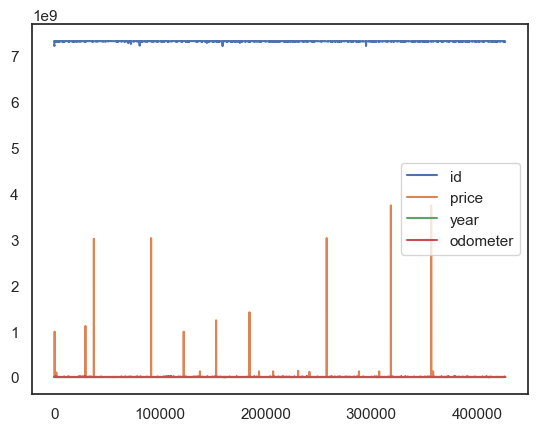

In [183]:
# Id feature presnt
df.plot()

In [184]:
# There are plenty non-numerical( categorical = 14) features
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   region        426880 non-null  object 
 2   price         426880 non-null  int64  
 3   year          425675 non-null  float64
 4   manufacturer  409234 non-null  object 
 5   model         421603 non-null  object 
 6   condition     252776 non-null  object 
 7   cylinders     249202 non-null  object 
 8   fuel          423867 non-null  object 
 9   odometer      422480 non-null  float64
 10  title_status  418638 non-null  object 
 11  transmission  424324 non-null  object 
 12  VIN           265838 non-null  object 
 13  drive         296313 non-null  object 
 14  size          120519 non-null  object 
 15  type          334022 non-null  object 
 16  paint_color   296677 non-null  object 
 17  state         426880 non-null  object 
dtypes: f

In [185]:
# The mean and Std are far away from 0 and 1 respectively
df.describe()

,id,price,year,odometer
count,4.268800e+05,4.268800e+05,425675.000000,4.224800e+05
mean,7.311487e+09,7.519903e+04,2011.235191,9.804333e+04
std,4.473170e+06,1.218228e+07,9.452120,2.138815e+05
min,7.207408e+09,0.000000e+00,1900.000000,0.000000e+00
25%,7.308143e+09,5.900000e+03,2008.000000,3.770400e+04
50%,7.312621e+09,1.395000e+04,2013.000000,8.554800e+04
75%,7.315254e+09,2.648575e+04,2017.000000,1.335425e+05
max,7.317101e+09,3.736929e+09,2022.000000,1.000000e+07


In [186]:
# There are plenty missing or NaN values
df.head()

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,state
0,7222695916,prescott,6000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,az
1,7218891961,fayetteville,11900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ar
2,7221797935,florida keys,21000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fl
3,7222270760,worcester / central MA,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ma
4,7210384030,greensboro,4900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nc



##### At this stage we identified those issues.
- categorical features present
- missing value, nan present (drop or fillna)
- id and Vehicle identification number (VIN) present ( those need to be droped)
- normalization or scaling might need to be done as well

### Data Preparation

After our initial exploration and fine tuning of the business understanding, it is time to construct our final dataset prior to modeling.  Here, we want to make sure to handle any integrity issues and cleaning, the engineering of new features, any transformations that we believe should happen (scaling, logarithms, normalization, etc.), and general preparation for modeling with `sklearn`. 

##### This phase, which is often referred to as “data munging”, prepares the final data set(s) for modeling. Preparing the data includes for example a strategy on how to deal with missing values. In general, the data is usually not that clean as one would expect it to be. But since data of low quality can lead to wrong answers to the business questions, the data preparation step includes also data cleaning.


In [187]:
# Drop the ids feature (ID and VID)
df.drop(columns=['id'], inplace=True)
df.drop(columns=['VIN'], inplace=True)

In [188]:
# Droping 'size' feaure almost 72 % data is missing
print(f"The 'size' feature {round((len(df) - len(df['size'][df['size'].notna()])) / len(df) * 100, 2)}% data is missing, It will be dropped.")
df.drop(columns=['size'], inplace=True)

The 'size' feature 71.77% data is missing, It will be dropped.


In [189]:
print(f"The 'cylinders' feature {round((len(df) - len(df['cylinders'][df['cylinders'].notna()])) / len(df) * 100, 2)}% data is missing, It will be kept.")


The 'cylinders' feature 41.62% data is missing, It will be kept.


In [190]:
# Fill in the missing data and dropping not need data
df['condition'].fillna(df['condition'].value_counts().index[0], inplace=True)
df['drive'].fillna(df['drive'].value_counts().index[0], inplace=True)
df['type'].fillna(df['type'].value_counts().index[0], inplace=True)
df['paint_color'].fillna(df['paint_color'].value_counts().index[0], inplace=True)
df['manufacturer'].fillna(df['manufacturer'].value_counts().index[0], inplace=True)
df['cylinders'].fillna(df['cylinders'].value_counts().index[0], inplace=True)
df.dropna(inplace=True)

In [191]:
df.shape

(405594, 15)

In [192]:
print(f"Using fillna and dropna, we lost only {round((426880 - 405594)/426880*100,2)}% data.")

Using fillna and dropna, we lost only 4.99% data.


In [193]:
# Data correlation
df.head()

,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,type,paint_color,state
27,auburn,33590,2014.0,gmc,sierra 1500 crew cab slt,good,8 cylinders,gas,57923.0,clean,other,4wd,pickup,white,al
28,auburn,22590,2010.0,chevrolet,silverado 1500,good,8 cylinders,gas,71229.0,clean,other,4wd,pickup,blue,al
29,auburn,39590,2020.0,chevrolet,silverado 1500 crew,good,8 cylinders,gas,19160.0,clean,other,4wd,pickup,red,al
30,auburn,30990,2017.0,toyota,tundra double cab sr,good,8 cylinders,gas,41124.0,clean,other,4wd,pickup,red,al
31,auburn,15000,2013.0,ford,f-150 xlt,excellent,6 cylinders,gas,128000.0,clean,automatic,rwd,truck,black,al


In [194]:
# converting category values to numeric
data = df.copy()
data['region'] = data.region.astype('category').cat.codes
data['manufacturer'] = data.manufacturer.astype('category').cat.codes
data['model'] = data.model.astype('category').cat.codes
data['condition'] = data.condition.astype('category').cat.codes
data['fuel'] = data.fuel.astype('category').cat.codes
data['title_status'] = data.title_status.astype('category').cat.codes
data['transmission'] = data.transmission.astype('category').cat.codes
data['drive'] = data.drive.astype('category').cat.codes
data['type'] = data.type.astype('category').cat.codes
data['paint_color'] = data.paint_color.astype('category').cat.codes
data['state'] = data.state.astype('category').cat.codes
data['cylinders'] = data['cylinders'].apply(lambda x: int('0') if x == 'other' else int(x[0]))
data.head()

,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,type,paint_color,state
27,16,33590,2014.0,14,22617,2,8,2,57923.0,0,2,0,8,10,1
28,16,22590,2010.0,7,22999,2,8,2,71229.0,0,2,0,8,1,1
29,16,39590,2020.0,7,23024,2,8,2,19160.0,0,2,0,8,8,1
30,16,30990,2017.0,38,25837,2,8,2,41124.0,0,2,0,8,8,1
31,16,15000,2013.0,13,13581,0,6,2,128000.0,0,0,2,10,0,1


<Axes: >

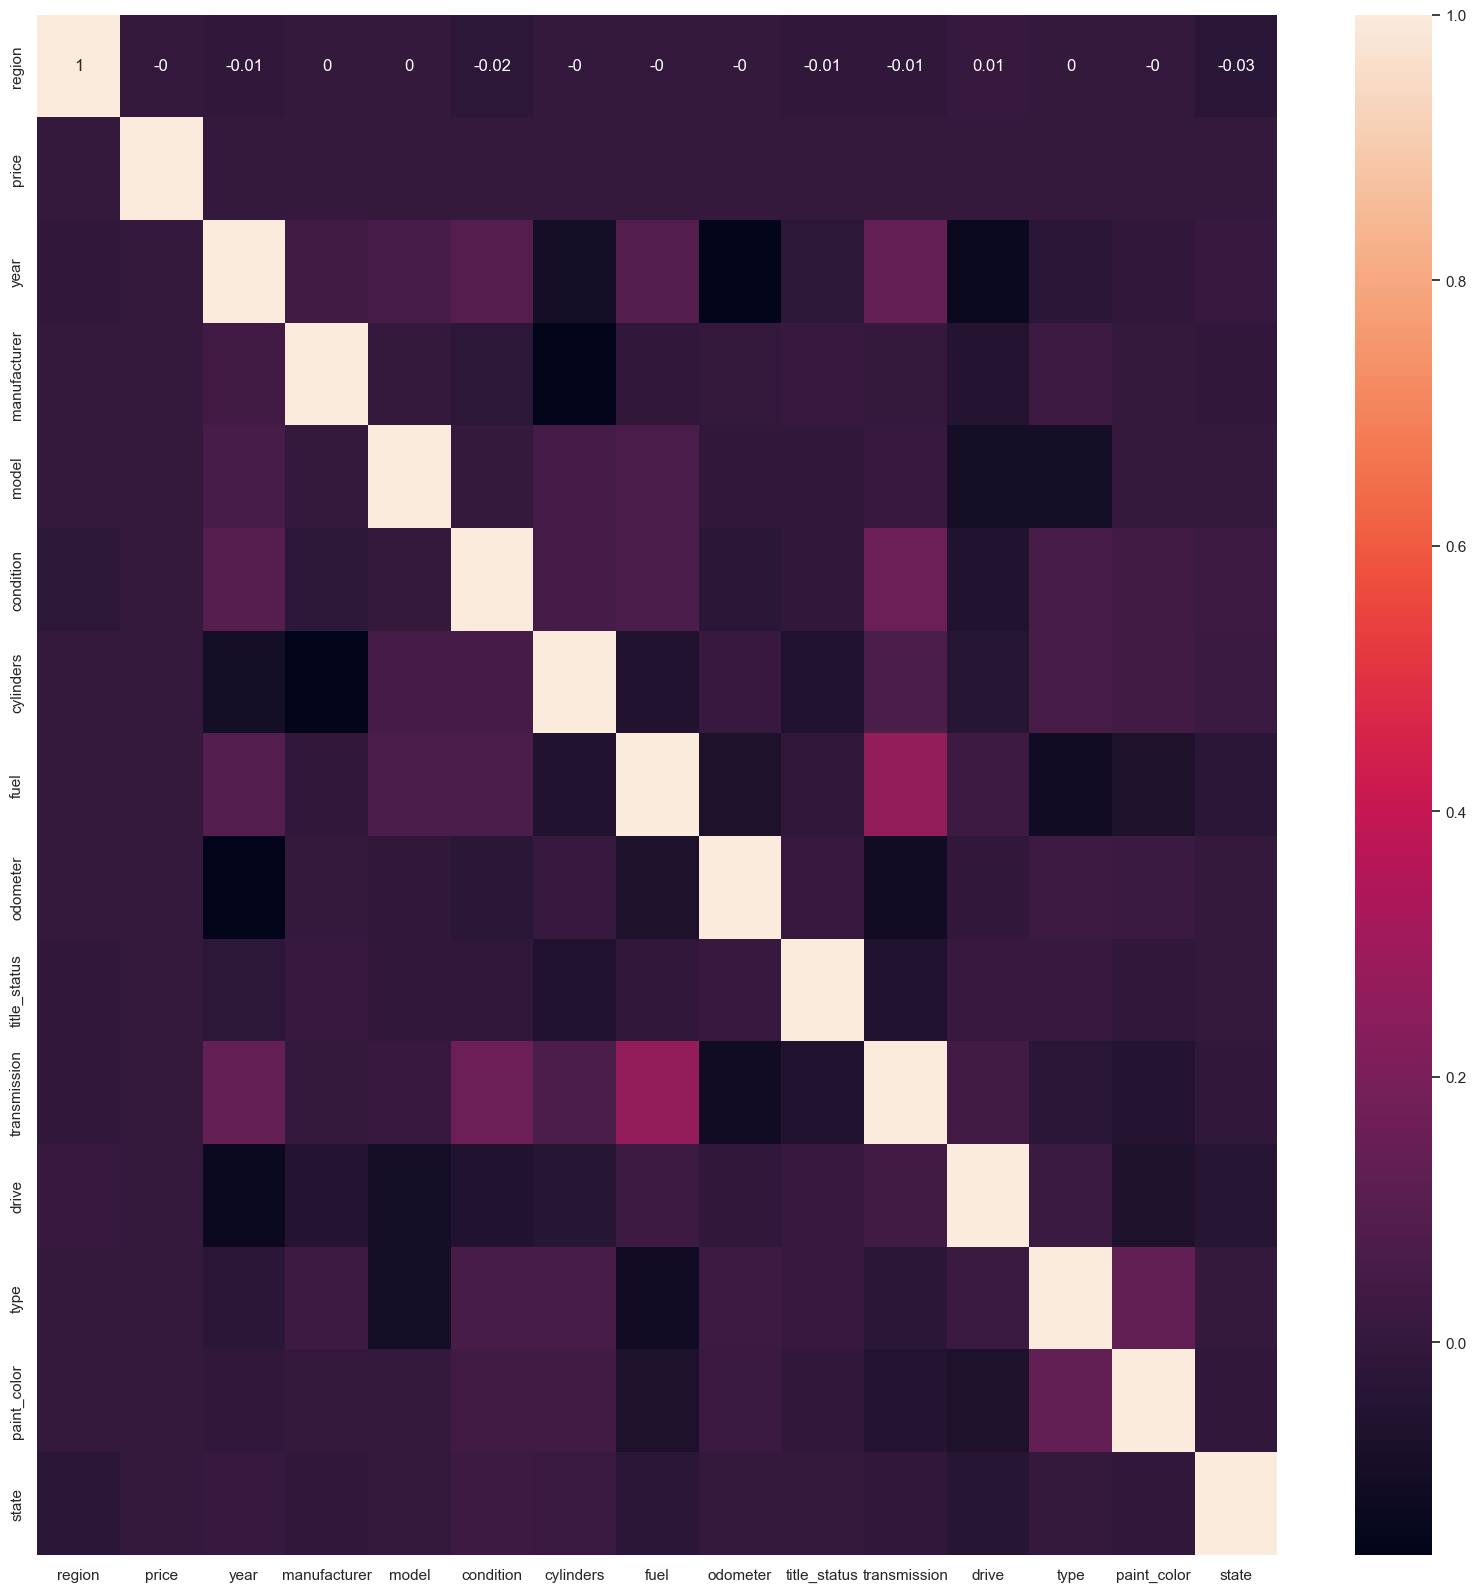

In [195]:
corr_coup=data.corr()
plt.figure(figsize=(20,20))
sns.heatmap(corr_coup.round(2),annot=True)

<Axes: >

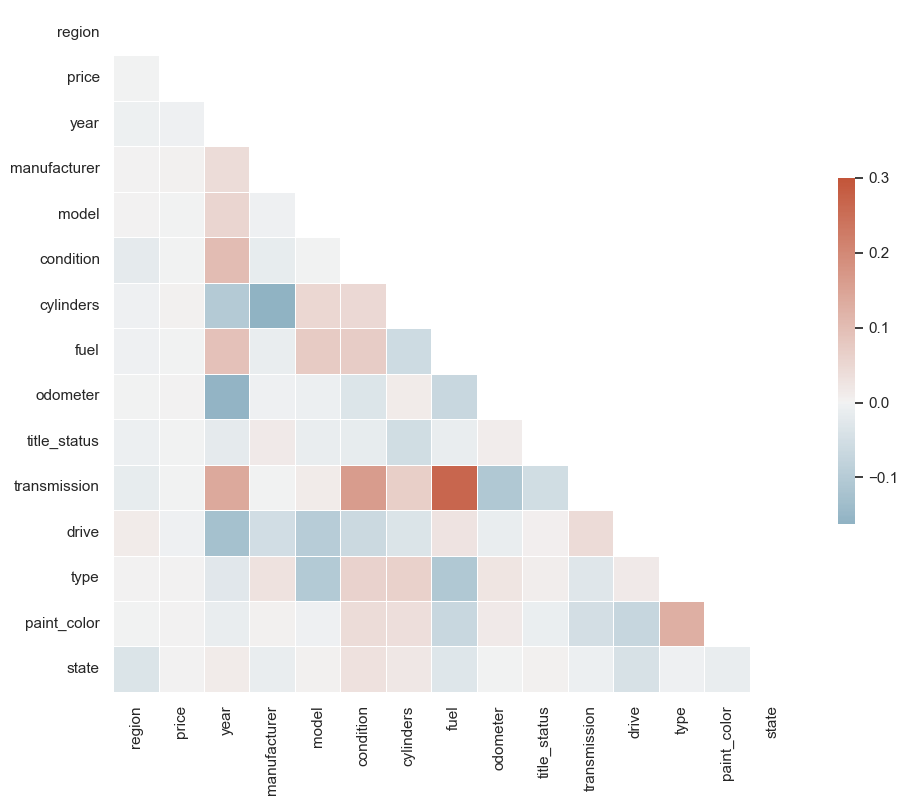

In [196]:
sns.set_theme(style="white")



# Compute the correlation matrix
corr = data.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [197]:
for column in df.select_dtypes('object').columns.tolist():
    if len(df[column].unique().tolist()) > 15:
        continue
    else:
        print(f"{column} {df[column].unique().tolist()}")

condition ['good', 'excellent', 'fair', 'like new', 'new', 'salvage']
cylinders ['8 cylinders', '6 cylinders', '4 cylinders', '5 cylinders', 'other', '3 cylinders', '10 cylinders', '12 cylinders']
fuel ['gas', 'other', 'diesel', 'hybrid', 'electric']
title_status ['clean', 'rebuilt', 'lien', 'salvage', 'missing', 'parts only']
transmission ['other', 'automatic', 'manual']
drive ['4wd', 'rwd', 'fwd']
type ['pickup', 'truck', 'other', 'sedan', 'coupe', 'SUV', 'hatchback', 'mini-van', 'offroad', 'bus', 'van', 'convertible', 'wagon']
paint_color ['white', 'blue', 'red', 'black', 'silver', 'grey', 'brown', 'yellow', 'orange', 'green', 'custom', 'purple']


In [198]:
# encode the ordered categorical columns, categorical data transformation to numerical
le=LabelEncoder()
enc_col_condition = ['condition']
data[enc_col_condition] = data[enc_col_condition].apply(lambda col:le.fit_transform(col))
data_num = data[data.select_dtypes(['int64','float64']).columns.tolist()]

In [199]:
# encode the categorical columns, categorical data transformation to numerical
ohe = OneHotEncoder(handle_unknown='ignore')
for column in  data.select_dtypes('object').columns.tolist():
    df_temp = pd.DataFrame(ohe.fit_transform(data[[column]]).toarray(), columns = ohe.categories_).head()
    data_num.join(df_temp)
data_num.head()

,price,year,condition,cylinders,odometer
27,33590,2014.0,2,8,57923.0
28,22590,2010.0,2,8,71229.0
29,39590,2020.0,2,8,19160.0
30,30990,2017.0,2,8,41124.0
31,15000,2013.0,0,6,128000.0


In [200]:
data.region.astype('category').cat.codes

27         16
28         16
29         16
30         16
31         16
         ... 
426875    397
426876    397
426877    397
426878    397
426879    397
Length: 405594, dtype: int16

### Modeling

With your (almost?) final dataset in hand, it is now time to build some models.  Here, you should build a number of different regression models with the price as the target.  In building your models, you should explore different parameters and be sure to cross-validate your findings.

This step is one of the core steps where one tries to find a model which describes the data. In terms of our business problem of predicting the price of a car based on its features, modellig means finding…, Choose and apply appropriate algorithms and methods to the data.

### Evaluation

With some modeling accomplished, we aim to reflect on what we identify as a high quality model and what we are able to learn from this.  We should review our business objective and explore how well we can provide meaningful insight on drivers of used car prices.  Your goal now is to distill your findings and determine whether the earlier phases need revisitation and adjustment or if you have information of value to bring back to your client.

Assess the results, validate the models, and determine if the project’s objectives are met.

### Deployment

Now that we've settled on our models and findings, it is time to deliver the information to the client.  You should organize your work as a basic report that details your primary findings.  Keep in mind that your audience is a group of used car dealers interested in fine tuning their inventory.

 Implement the model into the operational environment, if applicable. Plan monitoring and maintenance, Review project.